<a href="https://colab.research.google.com/github/sifat-hossain-niloy/Numerical_Analysis_Lab_3202/blob/main/Secant_vs_Newton_Raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i=0, xi-1=50.000000, f(xi-1)=124949.000000, xi=48.000000, f(xi)=110543.000000, xi+1=32.653200, Approx. Error=15.346800, Rel. Approx. Error=0.469994
i=1, xi-1=48.000000, f(xi-1)=110543.000000, xi=32.653200, f(xi)=34782.216422, xi+1=25.607395, Approx. Error=7.045805, Rel. Approx. Error=0.275147
i=2, xi-1=32.653200, f(xi-1)=34782.216422, xi=25.607395, f(xi)=16765.151835, xi+1=19.051166, Approx. Error=6.556229, Rel. Approx. Error=0.344138
i=3, xi-1=25.607395, f(xi-1)=16765.151835, xi=19.051166, f(xi)=6894.511419, xi+1=14.471728, Approx. Error=4.579439, Rel. Approx. Error=0.316440
i=4, xi-1=19.051166, f(xi-1)=6894.511419, xi=14.471728, f(xi)=3015.355296, xi+1=10.912027, Approx. Error=3.559701, Rel. Approx. Error=0.326218
i=5, xi-1=14.471728, f(xi-1)=3015.355296, xi=10.912027, f(xi)=1287.408517, xi+1=8.259868, Approx. Error=2.652159, Rel. Approx. Error=0.321090
i=6, xi-1=10.912027, f(xi-1)=1287.408517, xi=8.259868, f(xi)=554.273183, xi+1=6.254754, Approx. Error=2.005115, Rel. Approx. Error=0

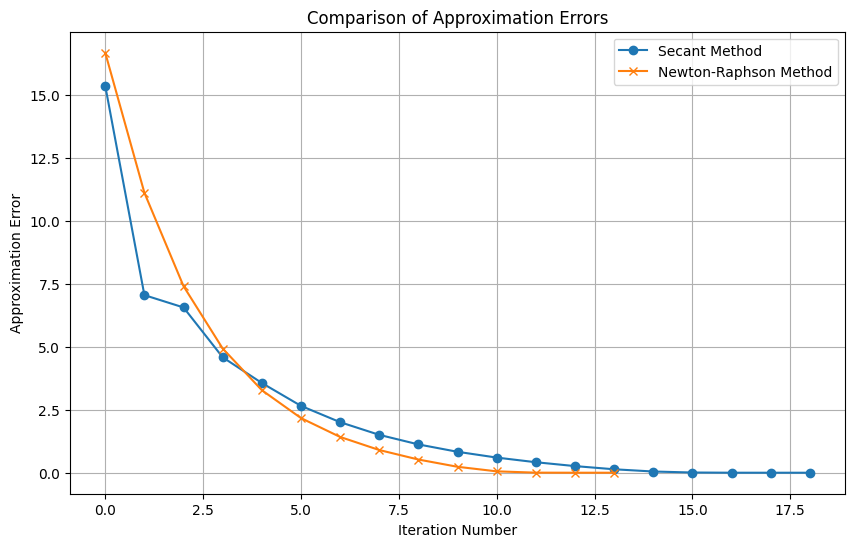

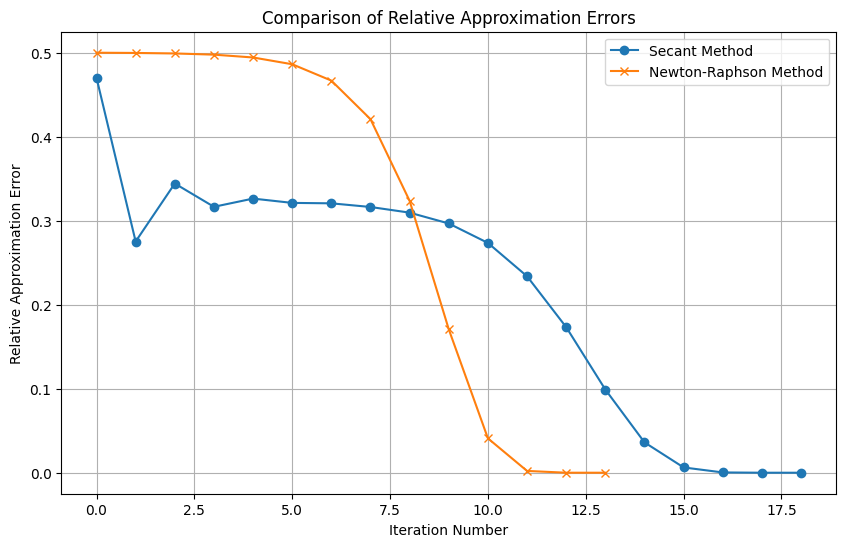

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 1

def df(x):
    return 3*x**2 - 1

def secant_method(x0, x1, tol=1e-6, max_iter=100):
    secant_results = []
    for i in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))

        # Compute errors
        approx_error = abs(x2 - x1)
        rel_approx_error = approx_error / abs(x2) if x2 != 0 else None

        secant_results.append((x0, f(x0), x1, f(x1), x2, approx_error, rel_approx_error))
        print(f"i={i}, xi-1={x0:.6f}, f(xi-1)={f(x0):.6f}, xi={x1:.6f}, f(xi)={f(x1):.6f}, xi+1={x2:.6f}, Approx. Error={approx_error:.6f}, Rel. Approx. Error={rel_approx_error:.6f}")


        if approx_error < tol:
            break

        x0, x1 = x1, x2

    return secant_results

def newton_raphson(x0, tol=1e-6, max_iter=100):
    newton_results = []
    x = x0

    for i in range(max_iter):
        x_new = x - f(x)/df(x)

        # Compute errors
        approx_error = abs(x_new - x)
        rel_approx_error = approx_error / abs(x_new) if x_new != 0 else None

        newton_results.append((x, f(x), df(x), x_new, approx_error, rel_approx_error))

        if approx_error < tol:
            break

        x = x_new

    return newton_results

# Secant and Newton-Raphson methods
secant_iterations = secant_method(50, 48)
newton_iterations = newton_raphson(50)

# Plotting approximation errors
secant_approx_errors = [res[5] for res in secant_iterations]
newton_approx_errors = [res[4] for res in newton_iterations]

plt.figure(figsize=(10, 6))
plt.plot(secant_approx_errors, label="Secant Method", marker='o')
plt.plot(newton_approx_errors, label="Newton-Raphson Method", marker='x')
plt.xlabel("Iteration Number")
plt.ylabel("Approximation Error")
plt.title("Comparison of Approximation Errors")
plt.legend()
plt.grid(True)
plt.show()

# Plotting relative approximation errors
secant_rel_approx_errors = [res[6] for res in secant_iterations]
newton_rel_approx_errors = [res[5] for res in newton_iterations]

plt.figure(figsize=(10, 6))
plt.plot(secant_rel_approx_errors, label="Secant Method", marker='o')
plt.plot(newton_rel_approx_errors, label="Newton-Raphson Method", marker='x')
plt.xlabel("Iteration Number")
plt.ylabel("Relative Approximation Error")
plt.title("Comparison of Relative Approximation Errors")
plt.legend()
plt.grid(True)
plt.show()
